**Universidad Internacional de Valencia**

**08 MBID - Visualización de Datos**

**Noviembre de 2021**

**3° Actividad Guiada**

**Sebastian Daza Leyva**

# **Actividad Google Colab - Python**

## **Importamos la librearias necesarias**

In [ ]:
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

## **Importamos el dataset de los pasajeros del Titanic**

In [ ]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

Visualizamos la estructura del dataset

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Renobramos las variables 'class' y 'fare'

In [ ]:
titanic.rename(columns = {'class': 'clase'}, inplace = True)

In [ ]:
titanic.rename(columns = {'fare': 'tarifa'}, inplace = True)

Validamos la modificación sobre la variable 'clase'

In [ ]:
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

Mostramos el cabecero de dataset

In [ ]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


Añadimos dos columnas 'is_old', 'is_baby' para identificar si los pasajeros eran mayores a 60 años o menores de 15 respectivamente 

In [ ]:
def is_old_func (row):
  return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func, axis = 1)

In [ ]:
titanic.eval('is_baby = age < 15', inplace = True)

Si quiseramos convertir una variable categórica en númerica ejecutaríamos el la siguiente línea (No es necesario en este caso porque la variable ya existe)

In [ ]:
#def clase_num_func (row):
  #Clase = {'Third': 3, 'Second': 2, 'First': 1}
  #return Clase[row.clase]

#titanic['clase_num'] = titanic.apply(clase_num_func, axis = 1)

Ejecutamos una consulta condicionada

In [ ]:
titanic[
        (titanic.sex == 'female')
        & (titanic['clase'].isin(['First', 'Third']))
        & (titanic.age > 45)
        & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False


## **Construimos algunos gráficos a partir del dataset**

**Barras**: Pasajeros Vs. Clase 

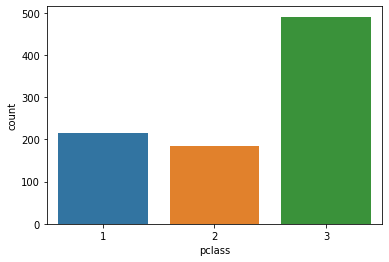

In [ ]:
sns.countplot(x = 'pclass', data = titanic)

**Distribución**: Pasajeros Vs. Edad

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


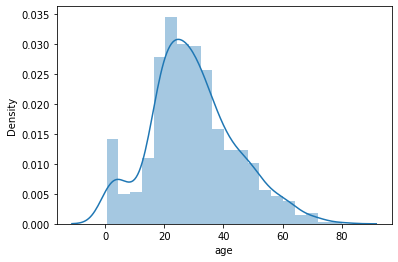

In [ ]:
sns.distplot(titanic.age.dropna())
plt.show()

**Boxplot**: Edad Vs. Sexo y Clase

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


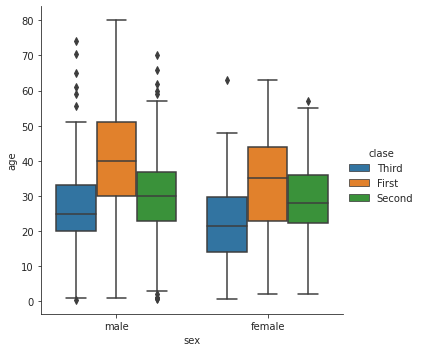

In [ ]:
with sns.axes_style(style = 'ticks'):
  ax = sns.catplot('sex', 'age', 'clase', data = titanic, kind = 'box')

**Distribución Cruzada**: Tarifa Vs. Edad

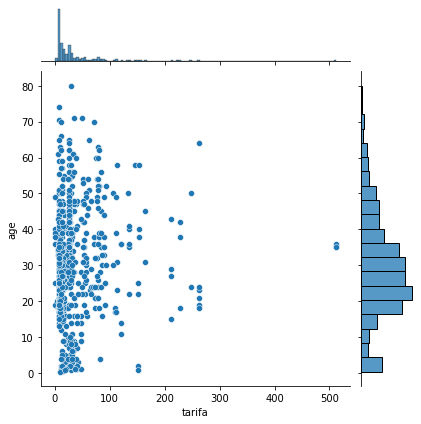

In [ ]:
sns.jointplot(x = 'tarifa', y = 'age', data = titanic)

**Ditribución Cruzada**: Edad Vs. Supervivencia y Clase

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

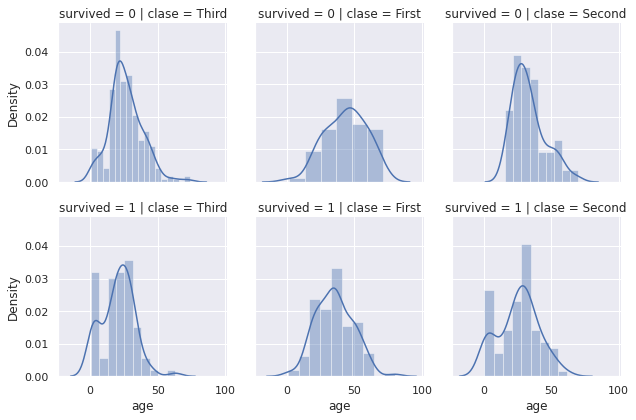

In [ ]:
sns.set(font_scale = 1)

g = sns.FacetGrid(titanic, row = 'survived', col = 'clase')
g.map(sns.distplot, 'age')
plt.show()

**Ditribución Cruzada**: Edad Vs. Tarifa

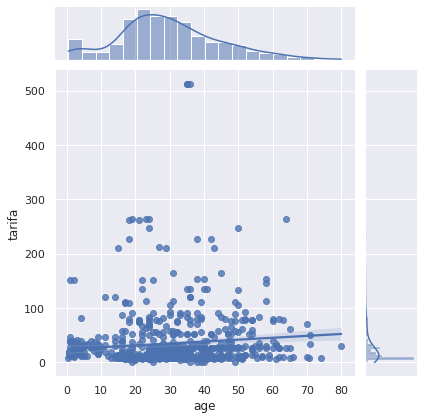

In [ ]:
sns.jointplot(data = titanic, x = 'age', y = 'tarifa', kind = 'reg', color = 'b')
plt.show()

**HeatMap**: Correlación variables numéricas

Text(0.5, 1.0, 'Correlación dataset Titanic')

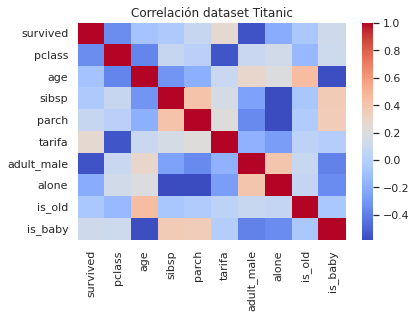

In [ ]:
tc = titanic.corr()

sns.heatmap(tc, cmap = 'coolwarm')
plt.title('Correlación dataset Titanic')

**Diagrama Dispersión**: Variables cuantitativas

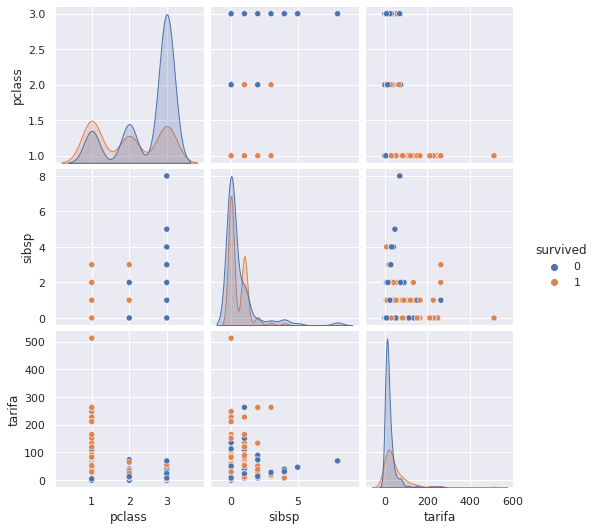

In [ ]:
titanic_num = titanic[['survived', 'pclass', 'sibsp', 'tarifa']]

sns.pairplot(titanic_num, hue = 'survived')
plt.show()

**Diagrama Dispersión**: Variables cuantitativas dataset Iris

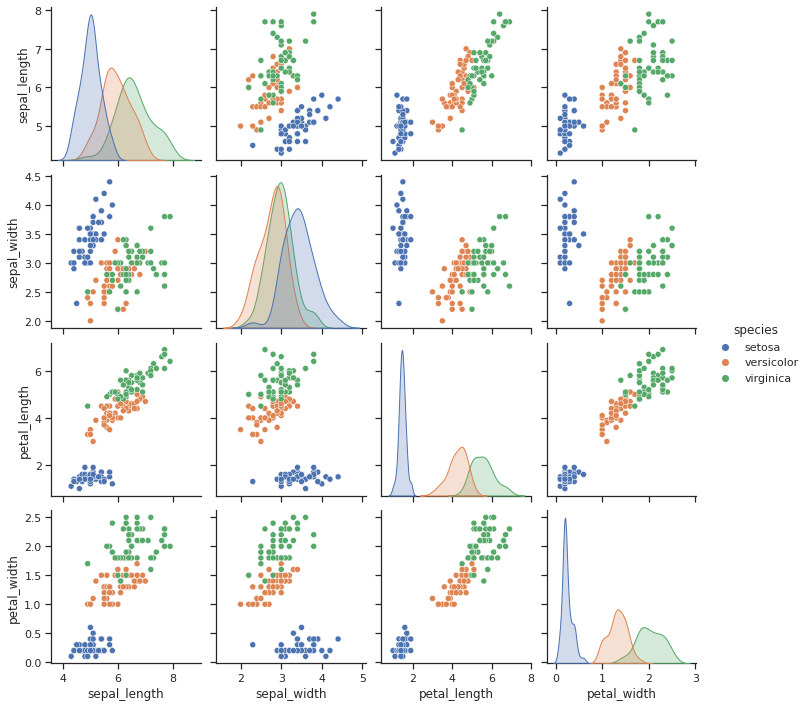

In [ ]:
sns.set(style = 'ticks')

df = sns.load_dataset('iris')

sns.pairplot(df, hue = 'species')
plt.show()

**Ditribución Cruzada**: Edad Vs. Clase y Género

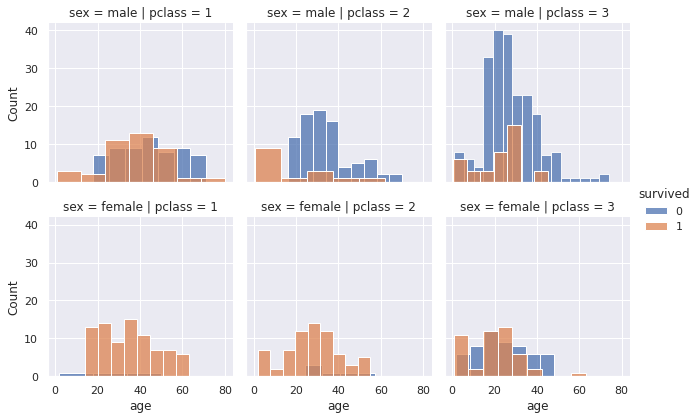

In [ ]:
sns.set(font_scale = 1)

g = sns.FacetGrid(titanic, row = 'sex', col = 'pclass', hue = 'survived')

g.map(sns.histplot, 'age')
g.add_legend()